# The Relationship between the Season of the Year and the Agressiveness of International Friendly Games

## Possible Ethinical Concerns

While this dataset is collected from public domains, but just like challenges with trace data, under such enormous data set, we could have possibilities of algorithmic biases, which could lead to concerns regarding beneficience. Although the name suggests this concern being applicable in machines, with this dataset built upon soccer resutls gained from online media information, such concern possibly exists. A large percentage of the data are related to results between European or Latin America teams. While this might be due to more number of matches from these teams, human biases could play a large role, especially how medias only like to talk about the typical strong teams, usually those of Europe/Latin America. With these biases in humans, the results from our data would likely be biased, and any actions (such as increase of fundings) based on this data would be beneficial to only part of the teams. For example, maybe there are way more matches between African teams not recorded by the data, but with the data collection biased towards European/Latin America tournaments, some African tournaments would receive less fundings. 

An unethical variable unincluded in the dataset could be the physical status of the team's leading player. Even if this information is avaliable online, we need to get an informed consent from the subjects despite this being an observed study. As these information is a part of someone's privacy, we need to respect other's autonomy, guided under the Belmont Report. Any individual should have the choice to volunteer in a study, and any person can decide whether their personal data should be participating in a study. 

## My Conceptualization + Cleaning Data Set

In this part, we would look at the relationship between the season of the year with the agressiveness of International Friendly games. The variable in "season of the year" would be conceptualized as three months out of 12, thus there are 4 seasons. The variable in aggressiveness of the game would be conceptualized as the total scores in goals by both teams on the field. Smaller sum is conceptualized as less competitiveness. The hypothesized causal mechanism behind this relationship is that the friendly games taking place near game seasons (Dec - Feb) would be less aggressive. Since both teams would use the friendly match as a way to practice, and more tactical strategies would be used in these games as opposed to games taking place in a "off-season," where players could play more freely with less attention to strategy in general. Thus, my first step is to find the correlation between "season of the year" and the total of home and away scores in friendly matches.

Since month is a nominal variable, I have to recategorize them with a new numeric variable: season number. Higher numbers would be closer to "off seasons" and lower numbers would be "game seasons". March - May: 1 (pre-season); June - August 0 (World Tournaments); September - November: 2 (Continental Matches) December - February  3 (Off-season). By categorizing with this ordering, "higher seasons" are associated with "higher aggressivenss," which operationalized from the sum of the friendly matche's home_score and away_score. Moreover, the type of tournament we are measuring is only friendly, and we are only consdiering games after 1930s, since that is when the first major international football tournments (world cup) started.

In [1]:
import numpy as np # import numpy
import pandas as pd # import pandas
data = pd.read_csv('results.csv') # import the data set
season_num = list() # initializee an empty list in season_num
season_type = list() # initalize an empty list for holding season_type
# loop over our data set, to put desginated month into their classificaitons
for i in data['date']:
    s = pd.to_datetime(i).month
    if s >= 3 and s <= 5:
        season_num.append(1)
        season_type.append("pre-season")
    elif s >= 6 and s <= 8:
        season_num.append(0)
        season_type.append("world tournaments")
    elif s >= 9 and s <= 11:
        season_num.append(2)
        season_type.append("continental matches")
    else:
        season_num.append(3)
        season_type.append("off-season")
# put these two lists as columns in the data set
data['season_num'] = season_num
data['season_type'] = season_type
# initalize another empty list
scores_total = list()
# loop over the observations, and sum up the scores for home and away
for i in range(data.shape[0]):
    scores_total.append(data['home_score'][i] + data['away_score'][i])
# put scores_total into the dataframe
data['scores_total'] = scores_total
# intialize another dataframe to hold only friendly matches
df_before = data.loc[data['tournament'] == 'Friendly']
# intialize another dataframe to hold matches after 1930, since that is when the first offical international football tournaments began
df_friendly = df_before.loc[pd.to_datetime(df_before["date"]) >= "1930"].copy()
# reset the indexes and show the data
df_friendly.reset_index(inplace = True)
df_friendly.head(10)

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,season_num,season_type,scores_total
0,1266,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,3,off-season,1
1,1267,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,3,off-season,1
2,1270,1930-02-09,Italy,Switzerland,4,2,Friendly,Rome,Italy,False,3,off-season,6
3,1271,1930-02-16,Kenya,Uganda,0,0,Friendly,Nairobi,Kenya,False,3,off-season,0
4,1273,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,3,off-season,2
5,1274,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,1,pre-season,2
6,1275,1930-03-23,Czechoslovakia,Austria,2,2,Friendly,Prague,Czechoslovakia,False,1,pre-season,4
7,1276,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,1,pre-season,6
8,1278,1930-04-06,Netherlands,Italy,1,1,Friendly,Amsterdam,Netherlands,False,1,pre-season,2
9,1279,1930-04-13,France,Belgium,1,6,Friendly,Colombes,France,False,1,pre-season,7


In [2]:
import scipy.stats as sp # import scipy.stats
print("season_num & scores_total:")
# use the pearsonr function to show the correltion
stat, pval = sp.pearsonr(df_friendly['season_num'], df_friendly['scores_total'])
print('Correlation is: {:.2}'.format(stat))
print('p-value is: {:.2}'.format(pval))

season_num & scores_total:
Correlation is: -0.013
p-value is: 0.085


## KNN Classification

Since we would be using KNN here, our DV would be a cateogrical variable, that is the four seasons as described above, and the numerical IV would be scores_total. Rather than categorizing "season of the year" with a numeric ordering, we could use the nominal variable in itself. Moreover, our data frame would still be df_friendly, which only includes friendly games after 1930. 

In [3]:
from sklearn.model_selection import train_test_split # import for splitting data
from sklearn.preprocessing import StandardScaler     # import feature scaling
from sklearn import metrics                          # import for evaluation metrics
from sklearn.neighbors import KNeighborsClassifier   # import for knn
# initialize X and Y values in scores_total and season_type
# use the train_test_split function to split into each category
X = df_friendly['scores_total'].values    
Y = df_friendly['season_type'].values    
x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,1), Y, test_size = 0.20, random_state = 99)
# initialize a new scaler and sclae our train/test set
scaler = StandardScaler()                
scaler.fit(x_train)
x_train = scaler.transform(x_train)     
x_test = scaler.transform(x_test)

In [16]:
# initialize a classifier with k = 5, the default option
# fit the classifier according to our data in x_train and y_train
classifier = KNeighborsClassifier(n_neighbors = 5)   
classifier.fit(x_train, y_train)
# predict on our x_test using the classifier
y_pred = classifier.predict(x_test) 
print("confusion matrix:")
#output the resulting confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))
print()
print("rows/columns of the confusion matric are in this order: ")
set(df_friendly['season_type'])

confusion matrix:
[[245 374 180  68]
 [179 301  99  40]
 [249 442 203  79]
 [235 367 137  66]]

rows/columns of the confusion matric are in this order: 


{'continental matches', 'off-season', 'pre-season', 'world tournaments'}

In [17]:
print(metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

continental matches       0.27      0.28      0.28       867
         off-season       0.20      0.49      0.29       619
         pre-season       0.33      0.21      0.26       973
  world tournaments       0.26      0.08      0.12       805

           accuracy                           0.25      3264
          macro avg       0.27      0.26      0.24      3264
       weighted avg       0.27      0.25      0.23      3264



When looking at our result from the confusion matrix, we could see that the IV not being a great predictor. Since the results of the f1-score for all four classifications is shown to be less than 0.3. As f1-score is the harmonic between the precision and the recall, it is the best value to measure the accuracy of classification. Therefore, with the f1-scores all being less than 0.3, the IV here is not a great predictor for the classifications. More explicitly, we could see that the value of Precision is on average higher than that of recall, which tells us that our model is better at minimizing false positives compared to minimizing false negatives. However, the classification of off-season has a larger recall than that of precision. Interestingly, off-season is the classification that has the highest f1-score and the least amount of support out of the four. 

## K-Means Clustering

In [6]:
import matplotlib.pyplot as plt # import matplotlib
from sklearn.cluster import KMeans# import kmeans

Note that we are taking out random observation in the original df_friendly data set, because of repeating server shutdowns when running silhouette score, we also setted a random_state/seed to keep our results constant for analysis.

In [7]:
# initialize a random seed, so that our randomization stays the same 
np.random.seed(33)
# a mask used to randomize the data set
mask = np.random.randint(len(df_friendly), size = 5000)
# initialize a X value to hold the two variables we are using and scale them 
X = df_friendly.loc[mask][['season_num','scores_total']].values
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(X)

In [8]:
# a function that calculates the k-means clustering with an arbitary k and variables season_num and scores_total
def find_kmeans(k, data = scaled_data):
    kmeans = KMeans(n_clusters = k, random_state = 98)
    kmeans.fit(data) 
    return kmeans

Graphs used below are used to find an optimal K

In [9]:
# initialize two empty lists to generate sum of the squared error and the silhouette score
sse = list() 
sh = list()
# use a loop to calculate the sum of the squared error and silhouette score for each disginated cluster
for k in range(1,11):
    kmeans = find_kmeans(k, scaled_data)
    sse.append(kmeans.inertia_)
    if k > 1:
        sh.append(metrics.silhouette_score(scaled_data, kmeans.labels_))

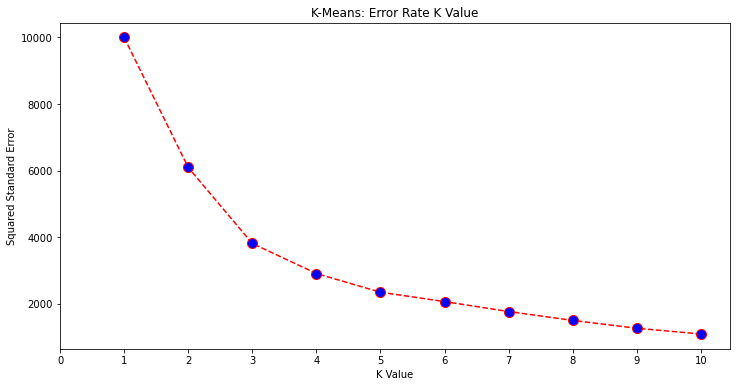

In [10]:
plt.figure(figsize = (12, 6)) # generate a figure of designated size
# plot the sum of the squared error 
plt.plot(range (1, len(sse) + 1), sse, color = 'red', linestyle = 'dashed', marker='o', markerfacecolor = 'blue', markersize = 10)
# plot the x-axis and the labels
plt.xticks(np.arange(0, 11, 1))
plt.title('K-Means: Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Squared Standard Error')
plt.show()

In [12]:
from kneed import KneeLocator # import KneeLocator
# locate the knee of the graph above
kl = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")
kl.elbow

3

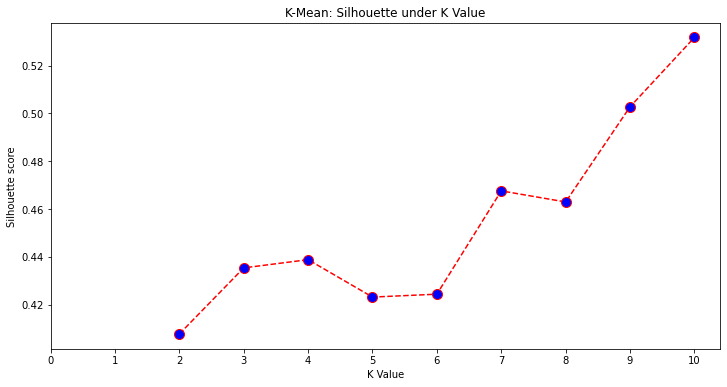

In [13]:
plt.figure(figsize = (12, 6)) # generate a figure
# plot the silhouette scores
plt.plot(range (2, len(sh) + 2), sh, color = 'red', linestyle = 'dashed', marker='o', markerfacecolor = 'blue', markersize = 10)
# plot the x-axis and the labels
plt.xticks(np.arange(0, 11, 1))
plt.title('K-Mean: Silhouette under K Value')
plt.xlabel('K Value')
plt.ylabel('Silhouette score')
plt.show()

Silhouette values, in general, should be intrepreted as a measure of how close samples are to their own clusters. When looking at the above graph, we could elminate k values of 2, 4 and 5 (without assigning random_state, the silhouette value would be different each time, but in my 10 runs, 2,4,5 on average have a low score) for their relative low values, especailly comparing with 3. Although, according to silhouette value along, it would suggest the k value with the highest score, such as 10. However, that k value is of course not optimal, and an optimal choice would be between 3,6,7,8 (without random_state, our value for 6, 7, 8 would vary, but on average in 10 runs, they are all relatively high).

According to the results of the "elbow method," we should use 3 clusters. While k value of 3 has a rather low silhouette score, it does seem to be more optimal compared with neighbors (2, 4, 5). If we use k value of 6 - 9, our kmeans clustering would be largely diverging from the "elbow method." Thus, 3 is the most opitmal k-value. Additionally, just for refrence again, seasons numebrs are defined as: pre-season (1), world tournaments(0), continental matches(2), off-season (3).

In [14]:
kmeans = find_kmeans(k = 3) # initialize kmeans with k = 3
df_X = df_friendly.loc[mask].copy() # create a new dataframe with our random mask
df_X['clust'] = kmeans.labels_ # insert a new columns that contains the assigned clusters
# initialize another data frame that only contain the three needed columns
clust_df = pd.DataFrame({'season_num': df_X['season_num'], 'scores_total': df_X['scores_total'], 'Cluster': df_X['clust']})

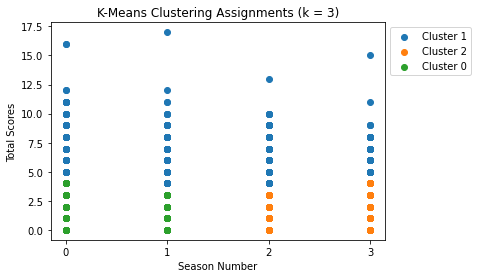

In [15]:
# in a loop, plot out the unique observations for each cluster
for clust in clust_df['Cluster'].unique():
    # pull out the observations that is in the current cluster
    sub = clust_df[clust_df['Cluster'] == clust]
    # with the x axis being season_num and y being scores_total
    plt.scatter(sub['season_num'], sub['scores_total'], label = 'Cluster {}'.format(clust)) 
# draw the labels, legends, and the x-axis of the graph
plt.title('K-Means Clustering Assignments (k = 3)')
plt.xticks(np.arange(0, 4, 1))
plt.xlabel('Season Number')
plt.ylabel('Total Scores')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Conclusion

As I used the IV of scores_total to classify the observations into four classifications under KNN, the results are mostly unaccurate. Through the confusion matrix analysis, we got an f-1 score below 0.3 for all four classifications. This suggest that our IV in scores_total might not be a great predictor for the categorical variable in four season types. However, through clustering, my data does appear to be somewhat meaningful. Shown above, we could see that three clustors split, but ignore the one that contains all four seasons, two clusters separate (pre-season (1), world tournaments(0)) and (continental matches(2), off-season (3)) apart. While this clustering does not follow my conceptualization of the four seasons, the separation do follow my conceptualization. In simpler words, if I could only conceptualize two seasons, pre-season and world tournaments would become game season, continental matches and off-season would become off season. Thus, I tried to cluster my data with a k-number of 2, and the clustering is what I expected. Therefore, the reason for the inaccurate f-1 score seen in knn could be a result of a false conceptualization. On the other hand, there is also many limitations with this dataset. Other than the potential ethical issue in algorithmiclly favoring results from European/Latin America teams, the lack in optimal numeric variables is also problems, with the absence of match time, number of fouls, number of goals attempted... While it would be hard to get these information for each match, a lack in numeric variabls also limit the possibility of data analysis we could perform using the data. Lastly, it would be intreseting to do a linear regression using my transformed numeric variable, season_num, with scores_total, as I only performed a knn analysis.

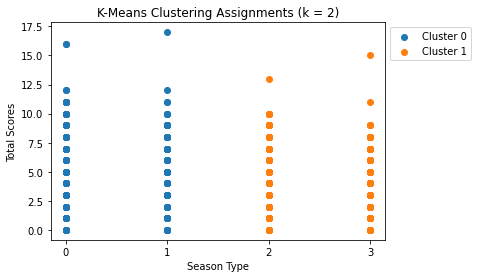

In [18]:
kmeans2 = find_kmeans(k = 2) # initialize kmeans with k = 2
df_X['clust'] = kmeans2.labels_ # insert the kmeans with k = 2 into the clust column of df_X
# initialize another data frame that only contain the three needed columns
clust_df2 = pd.DataFrame({'season_num': df_X['season_num'], 'scores_total': df_X['scores_total'], 'Cluster': df_X['clust']})
# in a loop, plot out the unique observations for each cluster
for clust in clust_df2['Cluster'].unique():
     # mask the observations that is in the current cluster
    sub = clust_df2[clust_df2['Cluster'] == clust]
    plt.scatter(sub['season_num'], sub['scores_total'], label = 'Cluster {}'.format(clust)) # large amount of duplicates
# draw the labels, legends, and the x-axis of the graph
plt.title('K-Means Clustering Assignments (k = 2)')
plt.xticks(np.arange(0, 4, 1))
plt.xlabel('Season Type')
plt.ylabel('Total Scores')
plt.legend(bbox_to_anchor=(1,1))
plt.show()